In [33]:
import numpy as np
from IPython.display import Image
import pdb
#
# [위치] f:\temp
#
# 동적계획법 이해: https://www.youtube.com/watch?v=0bqfTzpWySY
# 

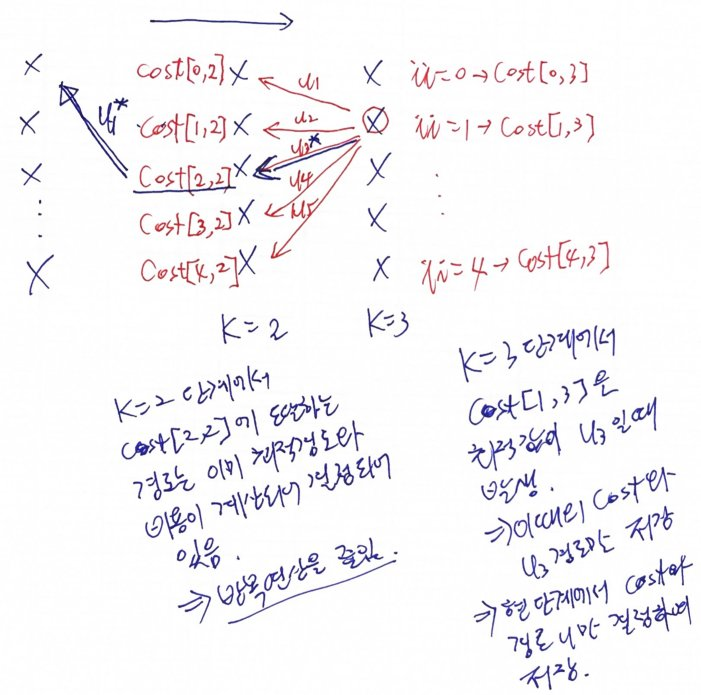

In [35]:
Image('dp요약.jpg')
# 만일 각 단계에서 이전 단계로 연결되는 경로의 최적값을 미리 계산하여 저장해 놓지 않으면,
# 탐색이 발생할 때 마다 후단의 모든 단계, 모든 경로를 재 탐색하여 다시 계산해야 한다.
# 이것은 과도하게 반복되는 계산을 발생시킴. DP는 이러한 반복연산을 LUT에 저장함에 의해 
# 제거 할 수 있음.
# LUT계산에는 현단계, 현노드에서 이전 단계로의 연결 중 최적연결을 선택(u*)하고, 이 연결과
# 그 때의 cost를 저장한다. 

In [39]:
# 시스템 매개변수
N = 10  # 예측 구간
Q = 1  # 상태 가중치
R = 1  # 제어 입력 가중치
x0 = 0 #0  # 초기 상태
u_max = 1  # 제어 입력 범위
u_min = -1  # 제어 입력 범위
num_grid = 50  # 상태 및 제어 입력 격자 수

control_ref = 0.5  ###### 목표 상태값


# 상태와 제어 입력 공간 격자화
x_grid = np.linspace(-5, 5, num_grid)
u_grid = np.linspace(u_min, u_max, num_grid)
#print(x_grid, u_grid)

# 비용 함수 초기화
cost_to_go = np.inf * np.ones((num_grid, N+1))
cost_to_go[:, -1] = 0  # 종단 비용 초기화
print(cost_to_go[:3,:])

# 최적 제어 입력 저장
u_optimal = np.zeros((num_grid, N))
print(u_optimal.shape, u_optimal[:3,:])


# DP를 이용한 비용 함수 계산
for k in range(N-1, -1, -1):
    for ii, x in enumerate(x_grid):  # x값이 바뀜에 따라 아래 best의 u값이 선택되어도 cost값은 달라짐. 이 cost를 ii위치에 저장
        for jj, u in enumerate(u_grid):  # 주어진 x에 대해 u의 가능한 모든 값 중 cost가 최소가 되는 u를 선택하고, 그 때 cost값도 저장 
            x_next = x + u
            if x_next < x_grid[0] or x_next > x_grid[-1]:
                continue
            cost = (x-control_ref)**2 + u**2
            idx_next = np.argmin(np.abs(x_grid - x_next))  # 예측된 상태와 가능한 상태값 중 제일 가까운 값을 주는 인덱스
            total_cost = cost + cost_to_go[idx_next, k+1]
            
            # 현재의 ii(상태값), k(단계)에 대해 가능한 모든 u를 순회하여, 
            # 최소 비용을 주는 u값과 그 때의 cost를 LUT의 (ii,k)위치에 저장
            if total_cost < cost_to_go[ii, k]:
                cost_to_go[ii, k] = total_cost
                u_optimal[ii, k] = u
                #print(k,ii,jj,idx_next, x,u,cost,cost_to_go[idx_next, k+1],total_cost)

        #pdb.set_trace()  # c누르면서 테스트
                

# 초기 상태에 대한 최적 제어 입력 시퀀스 생성
x = x0
u_seq = []
for k in range(N):
    idx = np.argmin(np.abs(x_grid - x))
    u = u_optimal[idx, k]
    u_seq.append(u)
    x += u
    print(idx, x, cost_to_go[idx,k])


# 결과 출력
print("Optimal control sequence:")
print(u_seq)

[[inf inf inf inf inf inf inf inf inf inf  0.]
 [inf inf inf inf inf inf inf inf inf inf  0.]
 [inf inf inf inf inf inf inf inf inf inf  0.]]
(50, 10) [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
24 0.30612244897959173 0.5183256976259891
26 0.4489795918367345 0.062161599333611164
27 0.4285714285714284 0.004164931278633966
27 0.40816326530612224 0.0036443148688047205
26 0.551020408163265 0.060599750104123426
27 0.5306122448979589 0.002603082049146229
27 0.5102040816326527 0.002082465639316983
27 0.4897959183673466 0.0015618492294877371
27 0.46938775510204045 0.0010412328196584915
27 0.4489795918367343 0.0005206164098292457
Optimal control sequence:
[0.30612244897959173, 0.1428571428571428, -0.020408163265306145, -0.020408163265306145, 0.1428571428571428, -0.020408163265306145, -0.020408163265306145, -0.020408163265306145, -0.020408163265306145, -0.020408163265306145]
